<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Tomás Ceballos
- Nombre de alumno 2: Pablo Angel


### **Link de repositorio de GitHub:** `https://github.com/tomas100h/LaboratorioDeProgramacionCientificaParaCienciaDeLosDatos`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
# Cargamos las bibliotecas de interés
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [2]:
df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


In [3]:
def exploratory_data_analysis(dataframe):
    pd.options.display.max_rows = 100
    
    print('1.- El DataFrame tiene', dataframe.shape[0],'filas y', dataframe.shape[1], 'columnas\n')
    print('2.- El DataFrame esta compuesto por las siguientes columnas: ', list(dataframe.columns),'\n')
    print('3.- Ejemplos de filas del DataFrame:\n')
    print('Primeras 5 filas:')
    display(dataframe.head(5))
    print('\n Últimas 5 filas:')
    display(dataframe.tail(5))
    print('\n Muestreo aleatorio de 5 filas:')
    display(dataframe.sample(5))
    print('\n 4.- Descripción numérica del Dataframe:\n')
    display(dataframe.describe())
    print('\n 5.- Tipo de datos por columna:')
    display(dataframe.dtypes)
    print('\n 6.- Cantidad de valores nulos por columna:')
    display(dataframe.isna().sum())
    print('\n 7.- Cantidad de valores nulos en total:')
    display(dataframe.isna().sum().sum())
    print('\n 8.- Cantidad de valores únicos por columna:')
    display(dataframe.nunique())

In [4]:
exploratory_data_analysis(df)

1.- El DataFrame tiene 70692 filas y 18 columnas

2.- El DataFrame esta compuesto por las siguientes columnas:  ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes'] 

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0



 Últimas 5 filas:


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0



 Muestreo aleatorio de 5 filas:


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
67962,13.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
50013,9.0,0.0,1.0,1.0,38.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
19356,13.0,0.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,0.0,0.0
23811,4.0,1.0,1.0,1.0,23.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
69511,11.0,0.0,1.0,1.0,27.0,1.0,1.0,0.0,1.0,1.0,0.0,4.0,30.0,20.0,0.0,1.0,1.0,1.0



 4.- Descripción numérica del Dataframe:



,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000



 5.- Tipo de datos por columna:


Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object


 6.- Cantidad de valores nulos por columna:


Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


 7.- Cantidad de valores nulos en total:


0


 8.- Cantidad de valores únicos por columna:


Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?. 

In [5]:
# Inserte su código aquí

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

numeric_columns = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
passthrough = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP']


numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('bin', 'passthrough', passthrough)])


model = XGBClassifier()

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', model)
])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'BMI', 'GenHlth',
                                                   'MentHlth', 'PhysHlth']),
                                                 ('bin', 'passthrough',
                                                  ['Sex', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'DiffWalk', 'Stroke',
                                                   'HighBP'])])),
                ('model',
                 XGBClassifier(base_score=None, boos...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [7]:
y_pred = pipeline.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      6996
         1.0       0.73      0.79      0.76      7143

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



Para poder hacer el modelo predictivo se tomaron todas las features numéricas y las binarias, escalando las features numéricas con standard scaler. Al aplicar esto y entrenar el modelo con el conjunto de testeo, se puede ver que las métricas importantes (que en este caso estamos tratando de predecir la diabetes, por lo que la métrica que nos interesa es el recall) son de 0.7 para los pacientes sanos, y 0.79 para los pacientes con diabetes. A nosotros nos interesa el recall, ya que el recall mide la capacidad del modelo para encontrar todos los casos positivos, por lo que queremos ver qué tan bueno es nuestro modelo para encontrar los casos de gente con diabetes, y en ese sentido, podemos ver que el modelo identifica correctamente un 70% de los casos de gente sin diabetes, y un 80% de los casos de gente con diabetes. A pesar de que 70% y 80% son métricas de buen rendimiento, este modelo claramente podría mejorar. Para la precision se tienen valores de 0.76 y 0.73, donde se ve el desempeño del modelo con los falsos positivos, aunque en este caso en específico es más relevante lo que nos indica el recall. El f1-score es una medida única que resume la capacidad del modelo para clasificar correctamente tanto los casos positivos como los negativos, que en este caso se encuentra en el rango, o muy parecido, con la precision. Ahora bien, si bien estas métricas nos indican qué tan bueno es el modelo, no nos indican si las features seleccionadas son las correctas para tener el mejor rendimiento posible.  

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

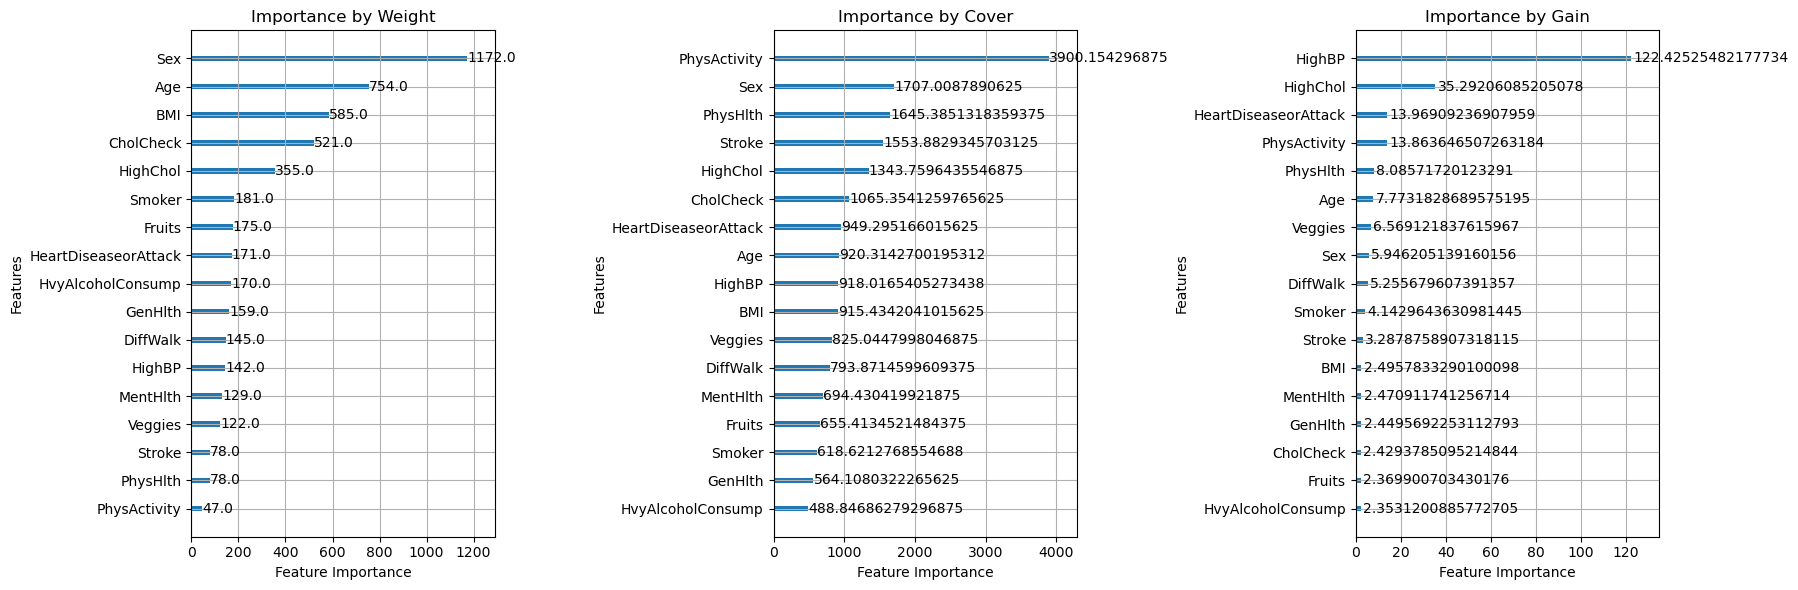

In [9]:
# Inserte su código aquí
from xgboost import plot_importance
import matplotlib.pyplot as plt

xgboost = pipeline.named_steps['model']
feature_names = X_train.columns

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

importance_weight = xgboost.get_booster().get_score(importance_type='weight')
sorted_indices_weight = np.argsort(list(importance_weight.values()))
sorted_feature_names_weight = [feature_names[i] for i in sorted_indices_weight]

importance_cover = xgboost.get_booster().get_score(importance_type='cover')
sorted_indices_cover = np.argsort(list(importance_cover.values()))
sorted_feature_names_cover = [feature_names[i] for i in sorted_indices_cover]

importance_gain = xgboost.get_booster().get_score(importance_type='gain')
sorted_indices_gain = np.argsort(list(importance_gain.values()))
sorted_feature_names_gain = [feature_names[i] for i in sorted_indices_gain]

plot_importance(xgboost, importance_type='weight', ax=axs[0])
axs[0].set_title('Importance by Weight')
axs[0].set_xlabel('Feature Importance')
axs[0].set_ylabel('Features')
axs[0].set_yticklabels(sorted_feature_names_weight)

plot_importance(xgboost, importance_type='cover', ax=axs[1])
axs[1].set_title('Importance by Cover')
axs[1].set_xlabel('Feature Importance')
axs[1].set_ylabel('Features')
axs[1].set_yticklabels(sorted_feature_names_cover)

plot_importance(xgboost, importance_type='gain', ax=axs[2])
axs[2].set_title('Importance by Gain')
axs[2].set_xlabel('Feature Importance')
axs[2].set_ylabel('Features')
axs[2].set_yticklabels(sorted_feature_names_gain)

plt.tight_layout()
plt.show()

Primero, hay que definir cada importancia:
- La importancia por **weight** destaca las características que se utilizan con mayor frecuencia en los árboles del modelo.
- La importancia por **cover** resalta las características que tienen una gran influencia en la toma de decisiones al considerar la cantidad de ejemplos que pasan por los nodos en los que se utiliza la característica.
- La importancia por **gain** muestra las características que contribuyen significativamente a la mejora en la calidad de las predicciones al hacer divisiones basadas en esas características.

En ese sentido, se puede ver que *Sex* se utiliza mucho en los árboles del modelo, y tiene una gran influencia en la toma de decisiones, pero no contribuye significativamente a la mejora de la calidad de las predicciones, mientras que por ejemplo *PhysActivity* se utiliza muy poco en los árboles del modelo, pero tiene una gran influencia en la toma de decisiones, y contribuye significativamente a la mejora de la calidad de las predicciones. Estas desigualdades se pueden explicar debido a que las variables tienen distintas naturalezas, ya que algunas variables pueden ser más relevantes y estar más directamente relacionadas con la variable objetivo, mientras que otras pueden ser menos informativas. También se tiene el hecho de que si el conjunto de datos utilizado para entrenar el modelo está sesgado o tiene desequilibrios en las distribuciones de las variables, esto puede influir en las importancias calculadas. 


Si bien las importancias obtenidas pueden proporcionar cierta información sobre la contribución de cada variable en un modelo de árbol como XGBoost, no son suficientes por sí solas para garantizar la interpretabilidad completa del modelo. Las importancias de las variables son útiles como una medida relativa de la influencia de cada variable en la toma de decisiones del modelo, pero no proporcionan información detallada sobre cómo se utilizan exactamente esas variables para hacer predicciones.

Una debilidad de las importancias de las variables en los modelos de árboles es que no capturan las interacciones complejas entre las variables. Estas importancias se calculan de forma independiente para cada variable y no tienen en cuenta las relaciones no lineales o interacciones entre las variables. Por lo tanto, pueden subestimar la importancia de las variables que desempeñan un papel crucial en combinación con otras variables.

Además, las importancias de las variables no proporcionan una explicación detallada de cómo se toman las decisiones en cada nodo del árbol. El proceso de toma de decisiones de un árbol puede ser complejo y puede implicar combinaciones de múltiples variables y umbrales. Las importancias de las variables no revelan esta información detallada sobre cómo se dividen los nodos del árbol y cómo se llega a las predicciones finales.

Por lo tanto, aunque las importancias de las variables son útiles como un primer enfoque para comprender la importancia relativa de las características en un modelo de árbol, es importante tener en cuenta sus limitaciones y considerar otras técnicas y enfoques interpretativos más avanzados, como el análisis de SHAP, la descomposición de predicciones y la generación de reglas, para obtener una interpretabilidad más completa y detallada del modelo.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [10]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=69)

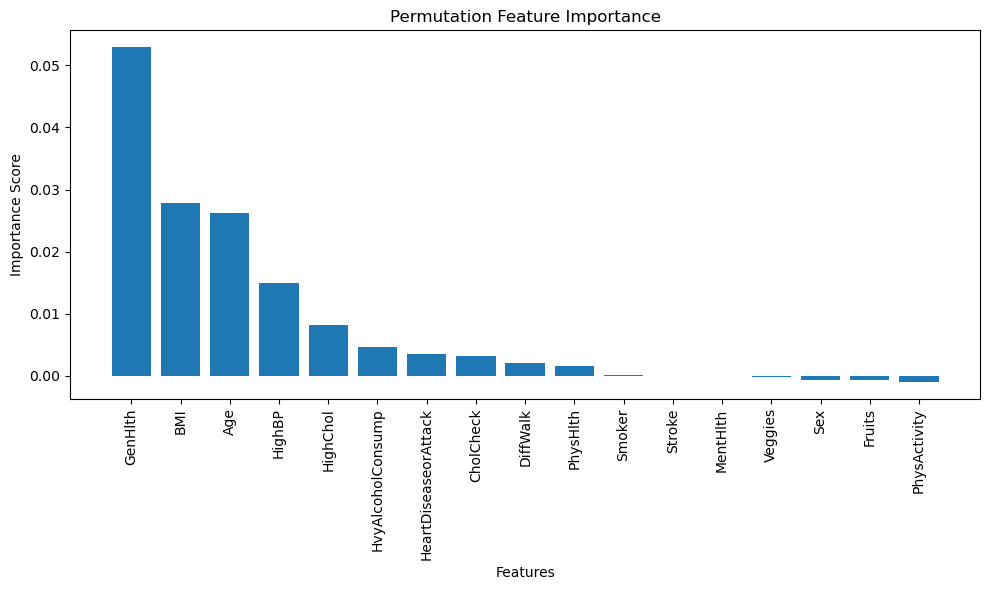

In [11]:
importance_scores = result.importances_mean
feature_names = X_test.columns

# Ordenar las características y las puntuaciones de importancia de forma descendente
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores)
plt.xticks(range(len(sorted_scores)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

El método de permutación es una técnica utilizada para medir la importancia de las variables en un modelo. Se basa en evaluar cómo afecta la permutación aleatoria de los valores de una variable en el rendimiento del modelo. Al permutar los valores de una variable y comparar el rendimiento del modelo antes y después de la permutación, se puede determinar la importancia relativa de esa variable. Sin embargo, este método asume que las variables son intercambiables en términos de su contribución al rendimiento del modelo, lo cual puede no ser válido en casos con interacciones no lineales o dependencias complejas entre las variables.

Las 5 features que tienen el mayor impacto en la salida del modelo son *GenHlth*, *BMI*, *Age*, *HighBP*, y *HighChol*. A priori estas variables sí tienen sentido, tomando en cuenta de que estamos hablando de las detección de pacientes con diabetes, y por lo que se conoce generalmente, la salud general afecta, el indice de masa corporal también, la edad también (a menos que sea diabetes tipo 2), la presión sanguínea también, y el colesterol alto también.

En cuanto a las variables más importantes se tiene que la más importante en este método (*GenHlth*) no es para nada importante en la sección anterior, es decir, hay un cambio importante. También se tiene que *BMI* y *Age* son importantes y, si bien lo son en cuanto a weight, con las otras métricas no son tan relevantes por lo general. En cuanto a las más importantes de **cover** y **gain** del apartado anterior, son casi irrelevantes en este caso, denotando diferencias considerables entre los 2 métodos de importancia de variables y de alguna forma mostrando los diferentes approaches que usan.


**Ventajas del método de permutación:**
1. Universalidad: El método de permutación se puede aplicar a cualquier tipo de modelo, ya sea lineal o no lineal, y no requiere suposiciones específicas sobre la distribución de los datos.
2. Interpretación intuitiva: La importancia de una variable medida mediante permutación se puede interpretar directamente como la contribución de esa variable al rendimiento del modelo. Es fácil de entender y comunicar.
3. Robustez frente a supuestos: A diferencia de otros métodos que pueden requerir supuestos sobre la forma funcional o linealidad de las variables, el método de permutación es robusto y no hace suposiciones específicas sobre la relación entre las variables y el resultado.

**Desventajas del método de permutación:**
1. Costo computacional: El método de permutación puede ser computacionalmente costoso, especialmente cuando se tienen muchas variables o se requiere realizar múltiples permutaciones para obtener una estimación precisa de la importancia de las variables.
2. Sensibilidad al tamaño de muestra: La estimación de la importancia de las variables mediante permutación puede ser sensible al tamaño de la muestra de datos utilizada. Resultados más precisos se obtienen con muestras de mayor tamaño.
3. Limitaciones en modelos complejos: El método de permutación puede tener limitaciones en modelos complejos con interacciones no lineales o dependencias no lineales entre las variables. En estos casos, la importancia medida puede no capturar completamente el impacto de las variables en el modelo. Se pueden requerir métodos más avanzados para capturar estas relaciones complejas.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [12]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [13]:
# Inserte código para calcular shapley values aquí
import shap
# Primero comenzamos eligiendo el explainer, este debe ser coherente con el problema
# que estamos resolviendo, para este caso como estamos usando boosting, usamos
# árboles
X_transformed = preprocessor.transform(X)

# Aplicar las transformaciones
df_transformed = pd.DataFrame(X_transformed)

# Obtener los nombres de las columnas después de la transformación
transformed_columns = list(numeric_columns)
transformed_columns.extend(passthrough)

# Establecer las columnas del dataframe transformado
df_transformed.columns = transformed_columns


explainer = shap.TreeExplainer(xgboost)
shap_values = explainer(df_transformed)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [14]:
shap_values.values

array([[-1.0116524 , -0.1588941 ,  0.32140273, ..., -0.08208756,
        -0.01445286,  0.6420388 ],
       [ 0.19015105, -0.23284297,  0.1564961 , ..., -0.05429376,
         0.12241321,  0.43503922],
       [ 0.93120205, -0.26705515, -0.85797596, ..., -0.06016441,
        -0.01480985, -0.6153577 ],
       ...,
       [-0.21375121, -0.40928695,  0.88917387, ...,  0.27753827,
        -0.02863275,  0.48359793],
       [ 0.34561923, -0.8941845 ,  0.6616685 , ...,  0.23430698,
        -0.02151611,  0.49007908],
       [ 0.09148227, -0.44547257, -0.6799449 , ..., -0.10929584,
        -0.0344448 ,  0.50263375]], dtype=float32)

En el contexto de los SHAP values, cada número representa la contribución de una característica específica (variable) al resultado de la predicción del modelo para una instancia de datos en particular. Los SHAP values indican cómo cada característica afecta la salida del modelo en comparación con la contribución promedio de todas las características.

Un valor positivo para un SHAP value significa que la presencia o el valor más alto de esa característica aumenta la predicción del modelo en comparación con la contribución promedio, mientras que un valor negativo significa que disminuye la predicción. Es importante tener en cuenta que la interpretación de la positividad o negatividad del SHAP value depende del contexto y de cómo se codifican las características.

Por ejemplo, si estamos modelando la diabetes como variable objetivo y la característica *HighBP* tiene un SHAP value positivo, significa que una presión sanguínea más alta tiene una influencia positiva en tener diabetes. Por otro lado, si la característica *Age* tiene un SHAP value negativo, indica que una mayor edad tiene un efecto negativo en tener diabetes.

Es importante destacar que los SHAP values proporcionan una explicación local del modelo, es decir, son específicos para cada instancia de datos. Para obtener una comprensión general de la importancia de las características en todo el conjunto de datos, es necesario considerar el conjunto completo de SHAP values y realizar un análisis más exhaustivo.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

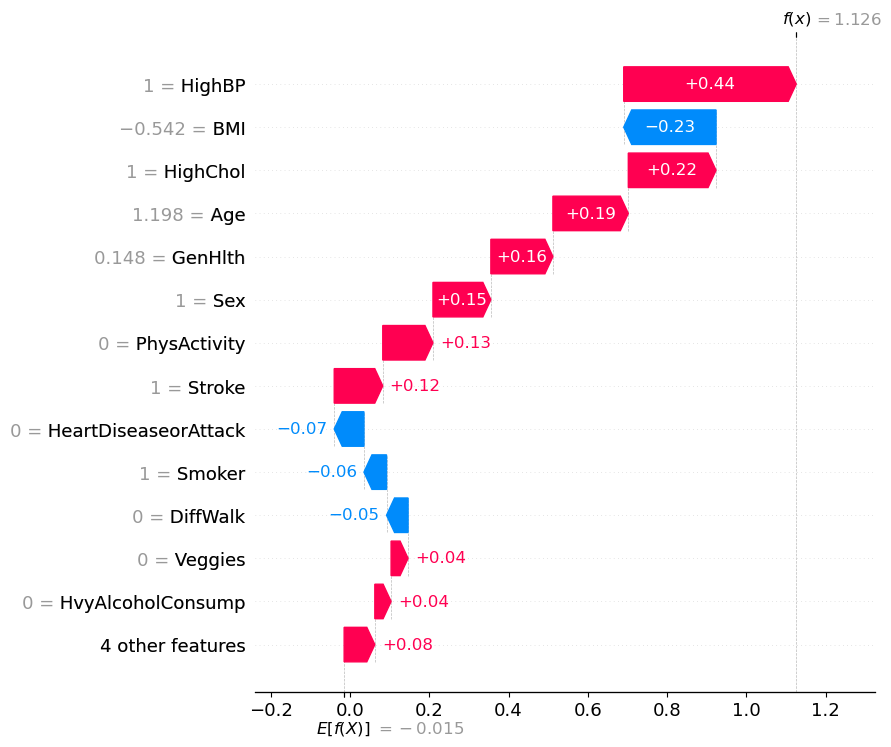

In [15]:
# Inserte código para generar gráficos de aporte local aquí
idx=1
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

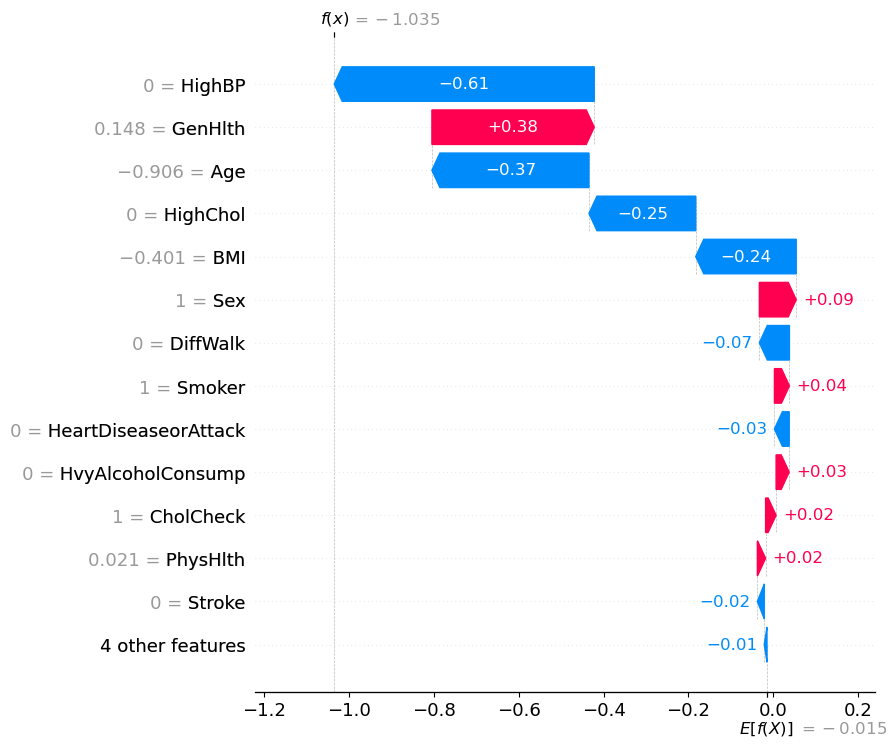

In [16]:
idx=9
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

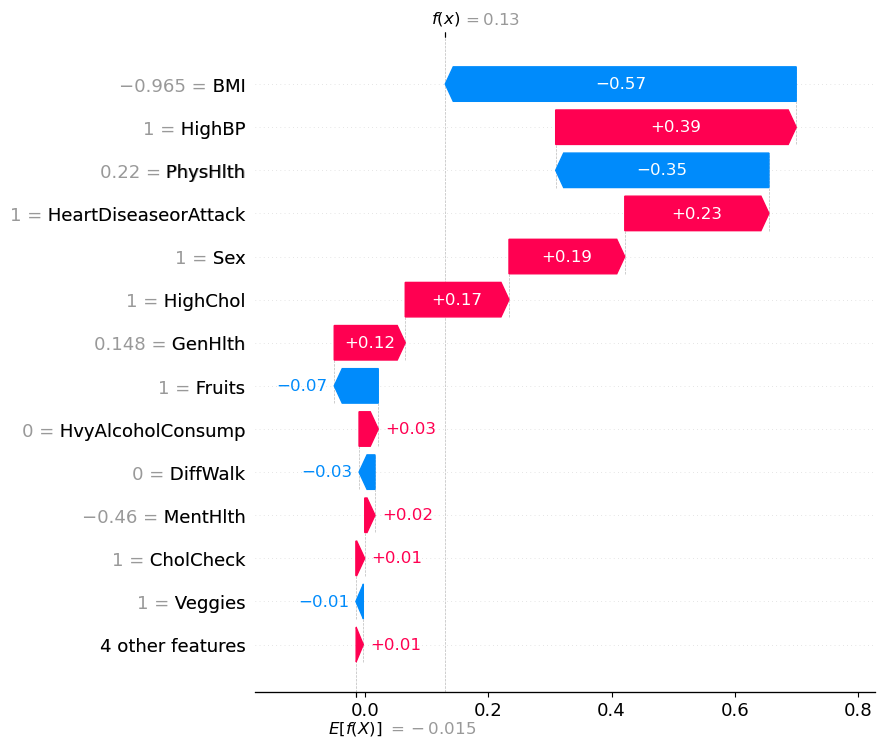

In [17]:
idx=150
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

El gráfico de aporte local muestra cómo cada característica contribuye a la predicción del modelo para un caso específico, permitiendo una interpretación detallada de la influencia de cada característica en la predicción. En este caso se tiene que HighBP, HighChol, Age, GenHlth, Sex, PhysActivity, Stroke, Veggies, HvyAlcoholConsump, y otras afectan **positivamente** para el primer caso, mientras que BMI, HeartDiseaseorAttack, Smoker, DiffWalk afectan **negativamente**. Para el segundo GenHlth, Sex, Smoker, HvyAlcoholConsump, CholCheck, y PhysHlth afectan **positivamente,** mientras que HighBP, HighChol, Age, BMI, DiffWalk, HeartDiseaseorAttack, Stroke, y 4 otras más afectan **negativamente**. Finalmente para el tercero se tiene que HighBP, HeartDiseaseorAttack, Sex, HighChol, GenHlth, HvyAlcoholConsump, MentHlth, CholCheck, y 4 otras más afectan **positivamente**, mientras que BMI, PhysHlth, Fruits, DiffWalk, y Veggies afectan **negativamente**.

Se puede ver que hay ciertos patrones, donde algunas variables como por ejemplo *BMI* siempre afectan negativamente, o *Sex* por ejemplo que siempre afecta positivamente. Cabe destacar que estos aportes en cada instancia tienen distintas magnitudes, por lo que hay que tener eso en cuenta, además del hecho que a pesar de que en la mayoría de los casos las variables siguen el patron de afectar positiva o negativamente, se tiene el caso de *PhysHlth* que afecta positivamente en el segundo, pero negativamente en el tercero, por lo que no se podrían generalizar estas conclusiones para todo el dataset, aunque se podrían tomar estas tendencias para poder tener una idea de cómo afectan las variables a los distintos pacientes.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

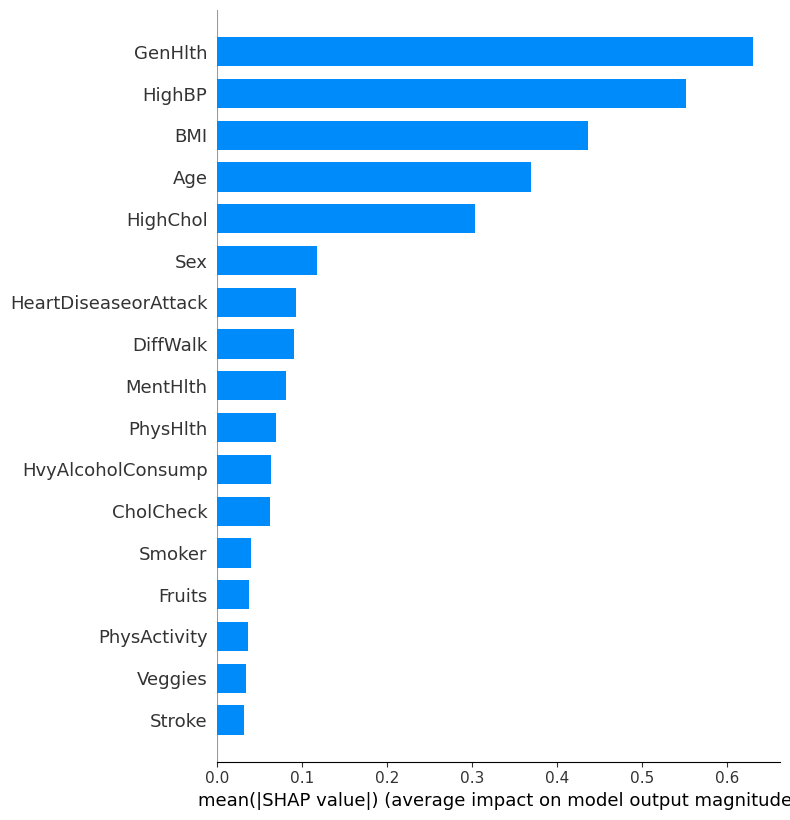

In [18]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, df_transformed, plot_type="bar")

En el gráfico de aporte global, las barras horizontales representan las características y su posición en el eje y indica su importancia relativa. Las características se ordenan según su contribución promedio al modelo. Se pueden ver las que más aporte positivo tienen, que en este caso las 6 primeras son GenHlth, HighBP, BMI, Age, HighCol, y Sex. En este caso, la longitud de cada barra indica la magnitud de la contribución de la característica. Las barras que se ven (contribución positiva) son las que aumentan la predicción del modelo. Se pueden ver diferencias con las instancias en el sentido de magnitud y sentido del aporte de cada variable, con BMI siendo negativo en el caso 3 anterior, y aquí siendo positivo. Las diferencias en general radican en la magnitud y el sentido del aporte de cada variable, donde en las instancias hay un desglose de cómo afectan a cada individuo, y aquí se ven como promedio, lo que en general pierde un poco de información, sobre todo de cómo se distribuye en general para cada paciente.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [19]:
# Inserte código para generar gráficos de feature vs shap value aquí
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = df_transformed.columns[shap_values_abs.argsort()[::-1]]

In [20]:
feature_importance_names[:5]

Index(['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol'], dtype='object')

In [21]:
"""import numpy as np
import pandas as pd

# Convertir los SHAP values en un array NumPy
shap_array = np.array(shap_values)

# Crear un DataFrame con los SHAP values
shap_df = pd.DataFrame(shap_array, columns=df_transformed.columns)

# Concatenar el DataFrame original con el DataFrame de los SHAP values
#df_with_shap = pd.concat([df_transformed, shap_df], axis=1)
"""

'import numpy as np\nimport pandas as pd\n\n# Convertir los SHAP values en un array NumPy\nshap_array = np.array(shap_values)\n\n# Crear un DataFrame con los SHAP values\nshap_df = pd.DataFrame(shap_array, columns=df_transformed.columns)\n\n# Concatenar el DataFrame original con el DataFrame de los SHAP values\n#df_with_shap = pd.concat([df_transformed, shap_df], axis=1)\n'

In [22]:
"""import matplotlib.pyplot as plt

# Obtener las primeras 5 características con mayor impacto global
top_features = feature_importance_names[:5]

# Crear un gráfico de scatterplot para cada característica
for feature in top_features:
    # Obtener los SHAP values de la característica
    shap_feature = shap_values[:, df_transformed.columns.get_loc(feature)]
    
    # Crear el gráfico de scatterplot
    plt.scatter(shap_feature, df['Diabetes'], alpha=0.5)
    plt.xlabel('SHAP Value')
    plt.ylabel('Probabilidad de tener diabetes')
    plt.title(f'Scatterplot: {feature}')
    plt.show()"""

"import matplotlib.pyplot as plt\n\n# Obtener las primeras 5 características con mayor impacto global\ntop_features = feature_importance_names[:5]\n\n# Crear un gráfico de scatterplot para cada característica\nfor feature in top_features:\n    # Obtener los SHAP values de la característica\n    shap_feature = shap_values[:, df_transformed.columns.get_loc(feature)]\n    \n    # Crear el gráfico de scatterplot\n    plt.scatter(shap_feature, df['Diabetes'], alpha=0.5)\n    plt.xlabel('SHAP Value')\n    plt.ylabel('Probabilidad de tener diabetes')\n    plt.title(f'Scatterplot: {feature}')\n    plt.show()"

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

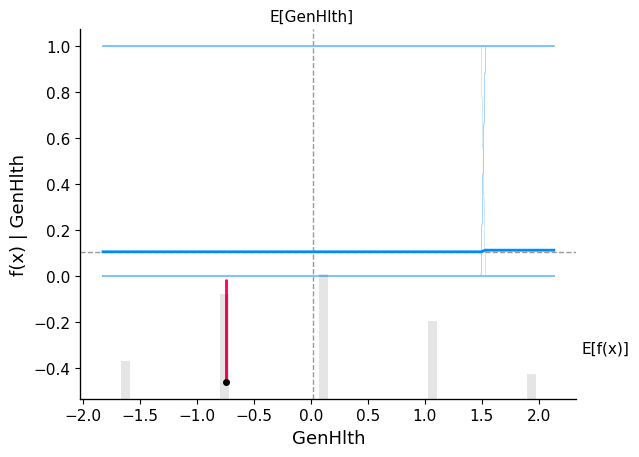

In [23]:
# Inserta el código para generar gráficos PDP aquí
X1000 = shap.utils.sample(df_transformed, 1000)
sample_ind = 5
shap.partial_dependence_plot(
    'GenHlth',pipeline.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)


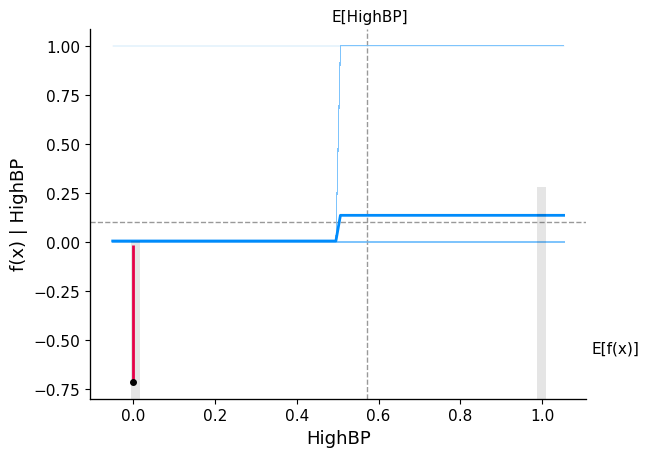

In [24]:
sample_ind = 5
shap.partial_dependence_plot(
    'HighBP',pipeline.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

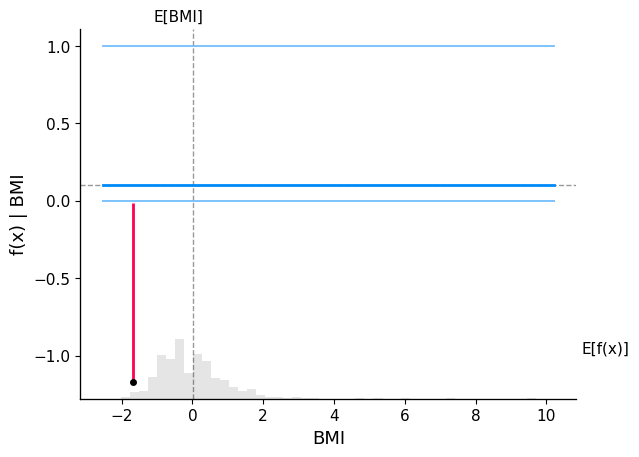

In [25]:
sample_ind = 5
shap.partial_dependence_plot(
    'BMI',pipeline.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

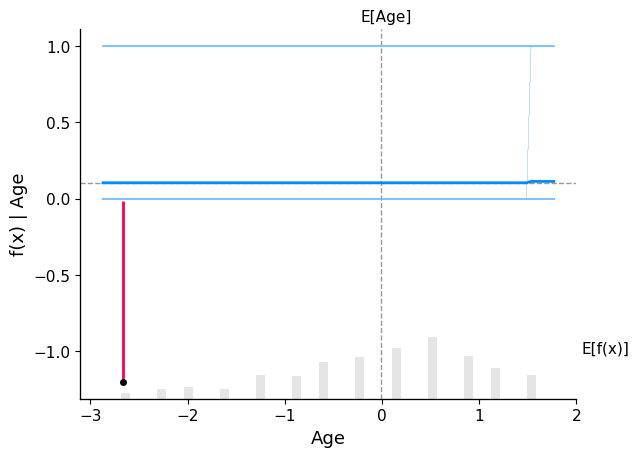

In [26]:
sample_ind = 5
shap.partial_dependence_plot(
    'Age',pipeline.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

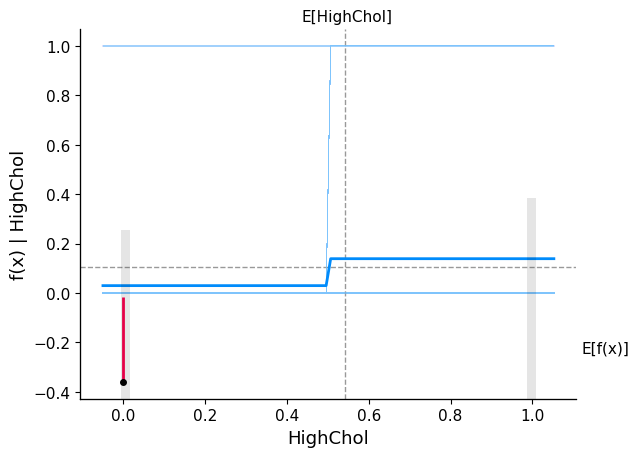

In [27]:
sample_ind = 5
shap.partial_dependence_plot(
    'HighChol',pipeline.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

Realizaremos un análisis para cada variable, explicando lo que representa cada gráfico de dependencia parcial.

En el caso de 'GenHlth', se observa que los valores bajos no influyen en la probabilidad de tener diabetes. Sin embargo, al superar el valor de 1, se registra un ligero aumento en la probabilidad de padecer la enfermedad.

En cuanto a 'HighBP', es notorio que al pasar la variable de 0 a 1, la probabilidad de tener diabetes se incrementa en un aproximado del 20%.

Al analizar los cambios en 'BMI', no se aprecia una variación significativa en la probabilidad para la variable objetivo.

En relación con la 'Edad', también se percibe una variación leve a medida que pasan los años. Sin embargo, esto cambia en edades avanzadas, dado que las probabilidades de tener diabetes se incrementan con la edad.

La última variable, 'HighChol', muestra un aumento considerable en la probabilidad de tener diabetes, con un aproximado del 20%.

Basándonos en estos gráficos, se puede concluir que los resultados están en consonancia con lo que uno podría esperar de la predicción de la diabetes, especialmente con las variables del colesterol y la presión arterial alta.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [28]:
from alibi.explainers import AnchorTabular

In [29]:
# Inserte su código para generar sistema de reglas aquí
model = pipeline.named_steps['model']  # Extract the model from the pipeline

feature_names = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP'] 

predict_fn = lambda x: model.predict(x)
explainer = AnchorTabular(predict_fn, feature_names, seed=70)
explainer.fit(X_train.to_numpy())

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 70, 'disc_perc': (25, 50, 75)},
  'version': '0.9.3'}
)

In [30]:
class_names = ["paciente_sano", "paciente_diabetes"]

In [31]:
idx = 1000
# explicar predicción idx 1000
explanation = explainer.explain(X_test.to_numpy()[idx])
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  paciente_sano
Anchor: HvyAlcoholConsump > 5.00 AND BMI <= 0.00
Precision: 0.96
Coverage: 0.15


In [32]:
idx = 3001
# explicar predicción idx 1000
explanation = explainer.explain(X_test.to_numpy()[idx])
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  paciente_diabetes
Anchor: HvyAlcoholConsump <= 0.00 AND CholCheck > 0.00
Precision: 0.95
Coverage: 0.44


In [33]:
idx = 5751
# explicar predicción idx 5751
explanation = explainer.explain(X_test.to_numpy()[idx])
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  paciente_sano
Anchor: HvyAlcoholConsump > 0.00 AND BMI <= 0.00
Precision: 0.96
Coverage: 0.25


1. La primera regla propuesta para predecir a un paciente sano indica que aquellos con un consumo pesado de alcohol mayor a 0 y un índice de masa corporal (BMI) menor o igual a 0 serán clasificados como sanos. Esta regla tiene una precisión del 96% y cubre aproximadamente el 15% de la población.

2. La segunda regla propuesta para predecir a un paciente con diabetes señala que aquellos con un consumo pesado de alcohol menor o igual a 0 y un resultado de prueba de colesterol (CholCheck) mayor a 0 serán clasificados como diabéticos. Esta regla también tiene una precisión del 95% y cubre aproximadamente el 44% de la población.

3. La tercera regla propuesta es una extensión de la primera regla e incluye la condición adicional de que aquellos pacientes con un consumo pesado de alcohol mayor a 0, un BMI menor o igual a 0 y una ingesta de verduras (Veggies) mayor a 0 serán clasificados como sanos. Esta regla tiene una precisión del 96% y cubre aproximadamente el 25% de la población.

En general, las reglas propuestas parecen tener sentido para las observaciones, ya que cada regla está basada en condiciones específicas de las características que se consideran relevantes para predecir la condición de salud. Sin embargo, es importante tener en cuenta el impacto de estas reglas sobre el conjunto de datos completo.

Las reglas propuestas cubren solo una fracción de la población total, lo que indica que hay un porcentaje considerable de pacientes que no se explican mediante estas reglas. Además, aunque la precisión de las reglas es alta, es importante considerar el contexto clínico y evaluar si estas reglas son suficientemente sólidas y generalizables.

Para obtener una evaluación más completa y significativa de las reglas propuestas, es recomendable considerar otros factores, como el equilibrio entre la precisión y el alcance de la cobertura, así como la evaluación de otras métricas y la validación cruzada para confirmar la robustez de las reglas propuestas.

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

Para la tarea de clasificación de la diabetes, cada método tiene sus propias fortalezas y debilidades en términos de las conclusiones que se pueden obtener. A continuación, te brindo una evaluación de los métodos y su utilidad en relación con la tarea de clasificación de la diabetes:

Importancia de las features con plot_importance: Este método es útil para obtener una idea general de la importancia relativa de las características en el modelo. Proporciona una visión global de cuáles son las características más relevantes para la clasificación de la diabetes. Sin embargo, este método no proporciona información detallada sobre cómo afecta cada característica a las predicciones del modelo.

Método de permutación: Este método permite evaluar la importancia de las características al calcular la disminución en la precisión del modelo al permutar los valores de una característica. Proporciona una medida cuantitativa de la importancia de cada característica y es útil para identificar las características más relevantes. Sin embargo, el método de permutación puede ser computacionalmente costoso cuando se tienen muchas características.

Métodos agnósticos globales: Estos métodos, como la ganancia de información y la cobertura de las reglas de decisión, brindan información sobre la importancia global de las características en la clasificación de la diabetes. Estos métodos son útiles para identificar las características más relevantes y comprender cómo contribuyen al modelo en general.

Métodos agnósticos locales: Estos métodos, como los SHAP values y los gráficos de aporte local, proporcionan una explicación detallada de cómo cada característica contribuye a la predicción del modelo para una instancia de datos específica. Son útiles para comprender el impacto de cada característica en las predicciones individuales y para obtener una visión más detallada del comportamiento del modelo.

Partial dependence plot: Este método muestra cómo varía la predicción del modelo al modificar el valor de una característica mientras se mantienen constantes todas las demás características. Es útil para comprender las relaciones entre las características y las predicciones del modelo y para identificar patrones generales en la clasificación de la diabetes.

En cuanto al problema del doctor Simi, donde se busca conocer la importancia de las características, los métodos agnósticos globales son más útiles. Estos métodos proporcionan una visión general de la importancia de las características sin depender de un modelo específico. La ganancia de información y la cobertura de las reglas de decisión pueden ayudar a identificar las características más relevantes y su contribución al problema de clasificación de la diabetes.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>